<a href="https://colab.research.google.com/github/filipefelisardo/Clepsydra/blob/main/temperaturas_1989.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

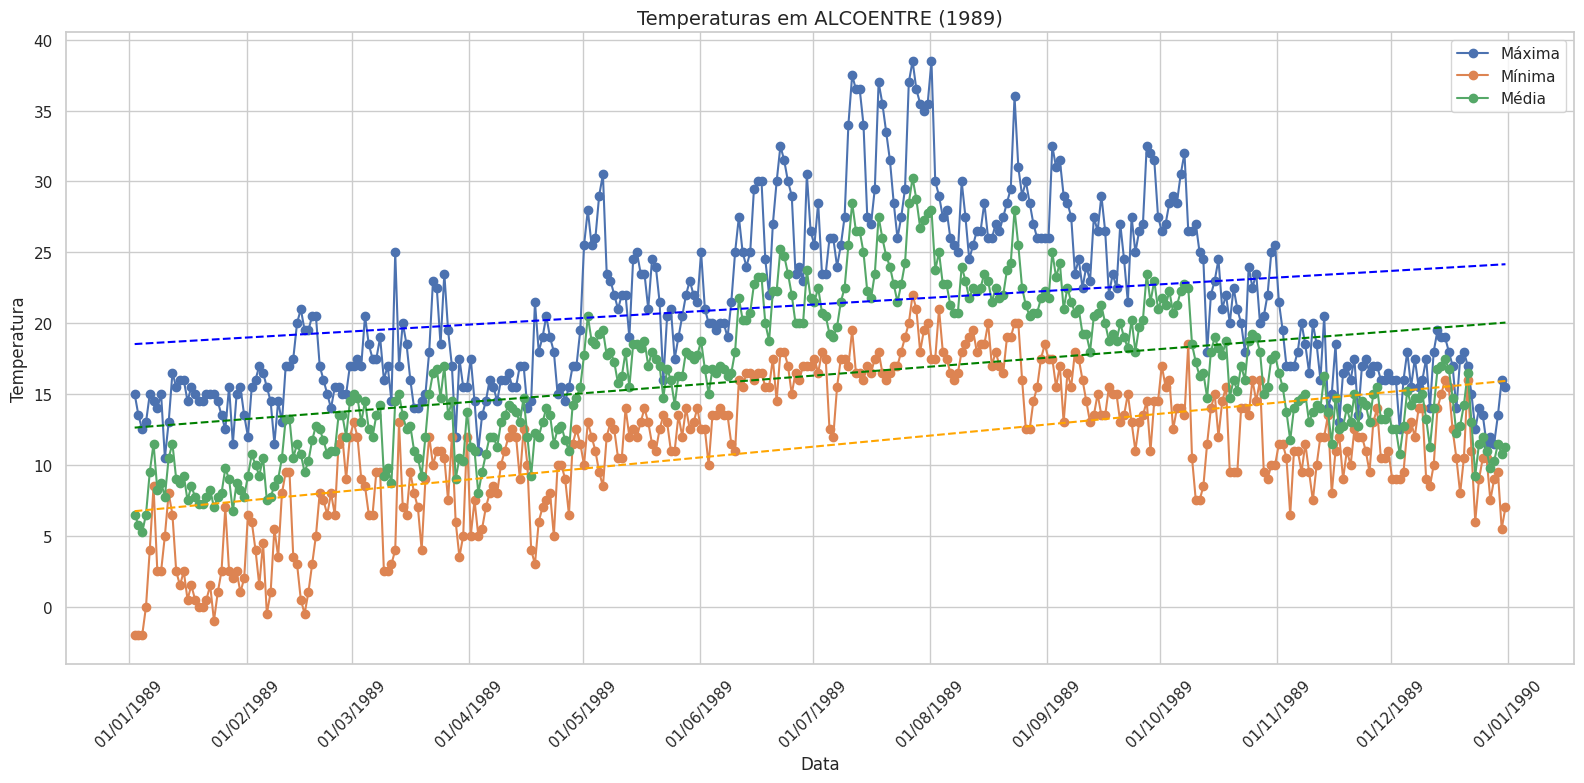

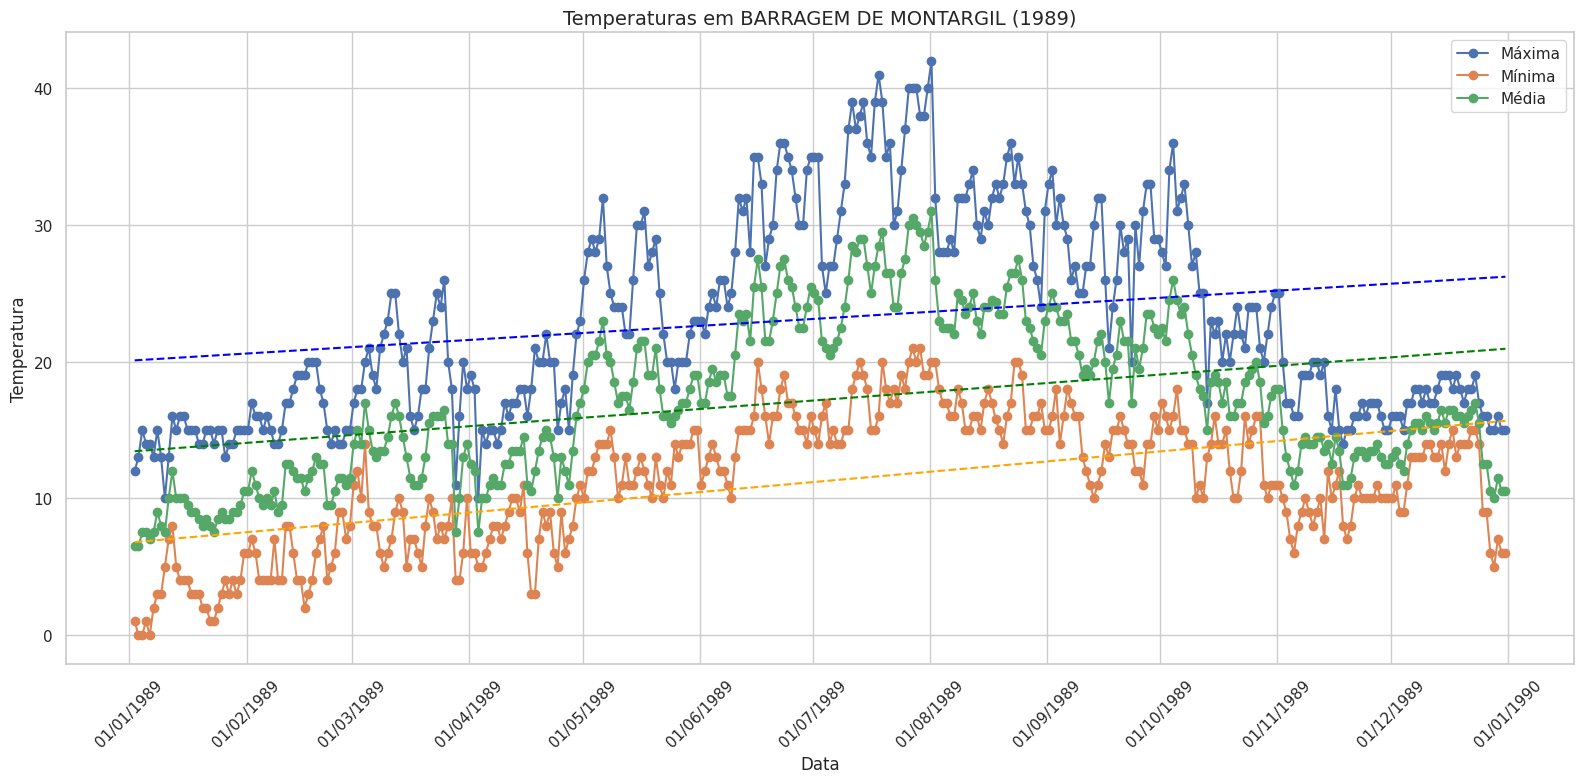

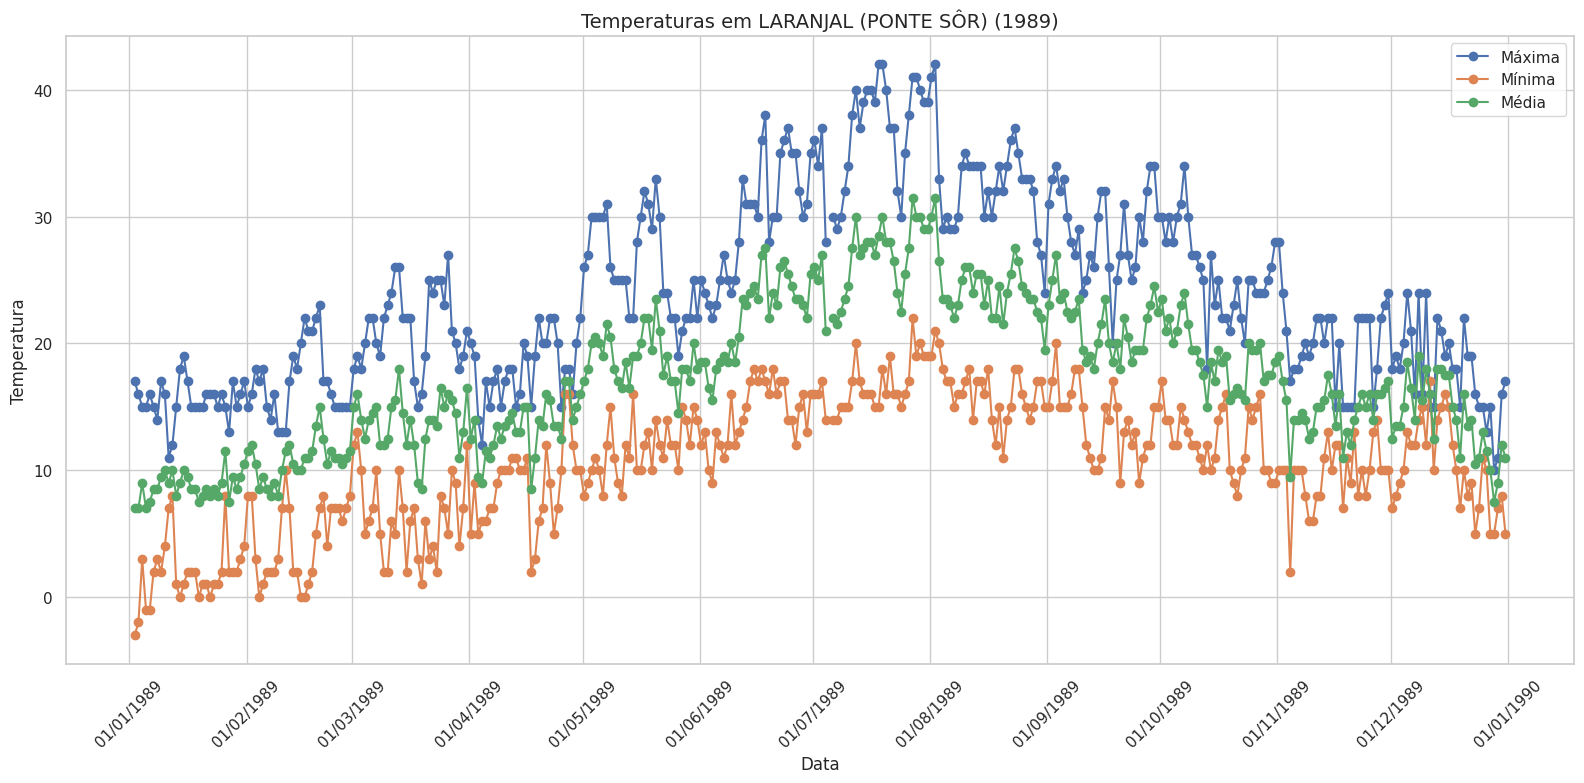

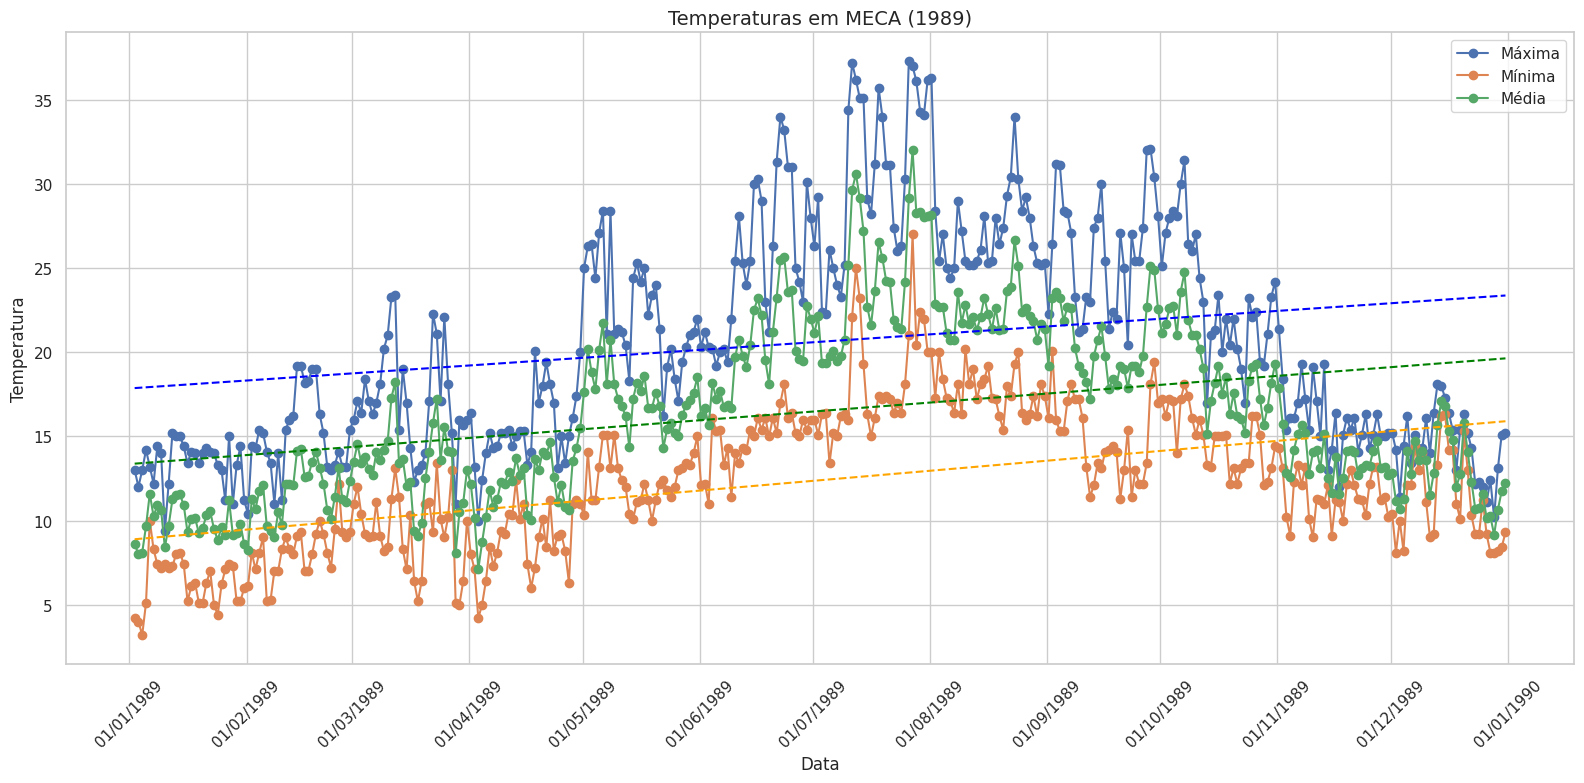

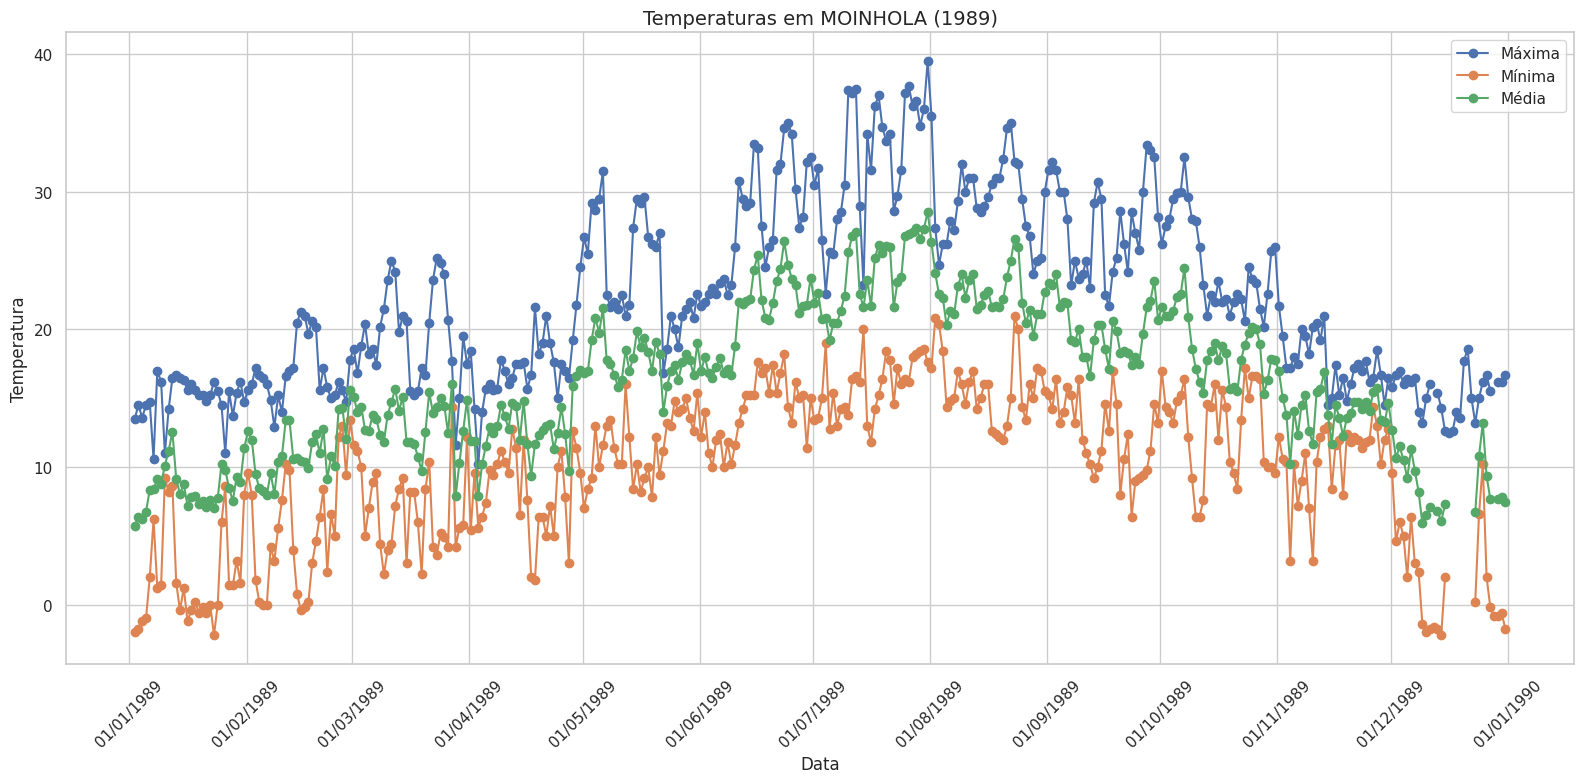

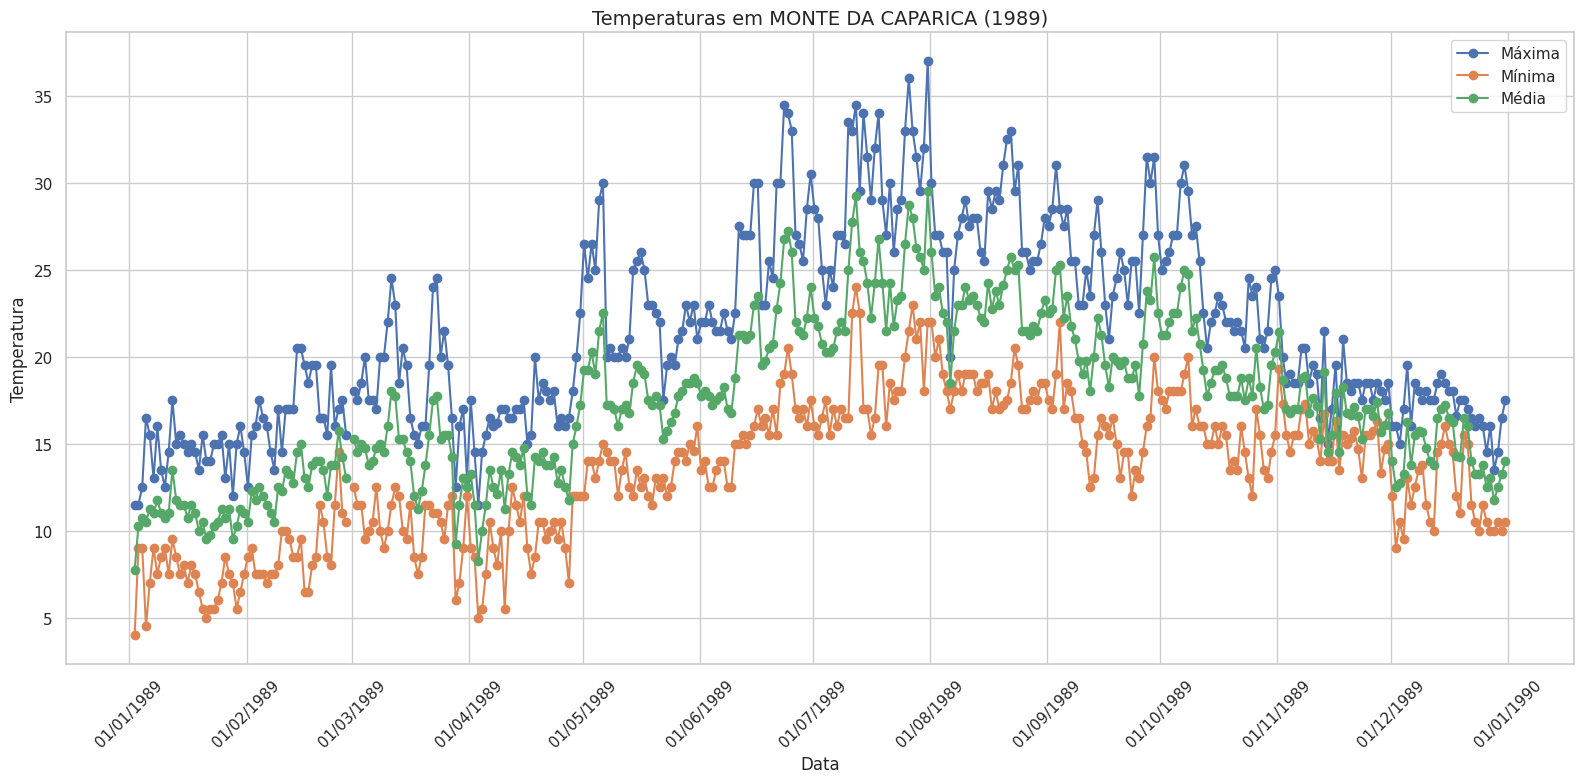

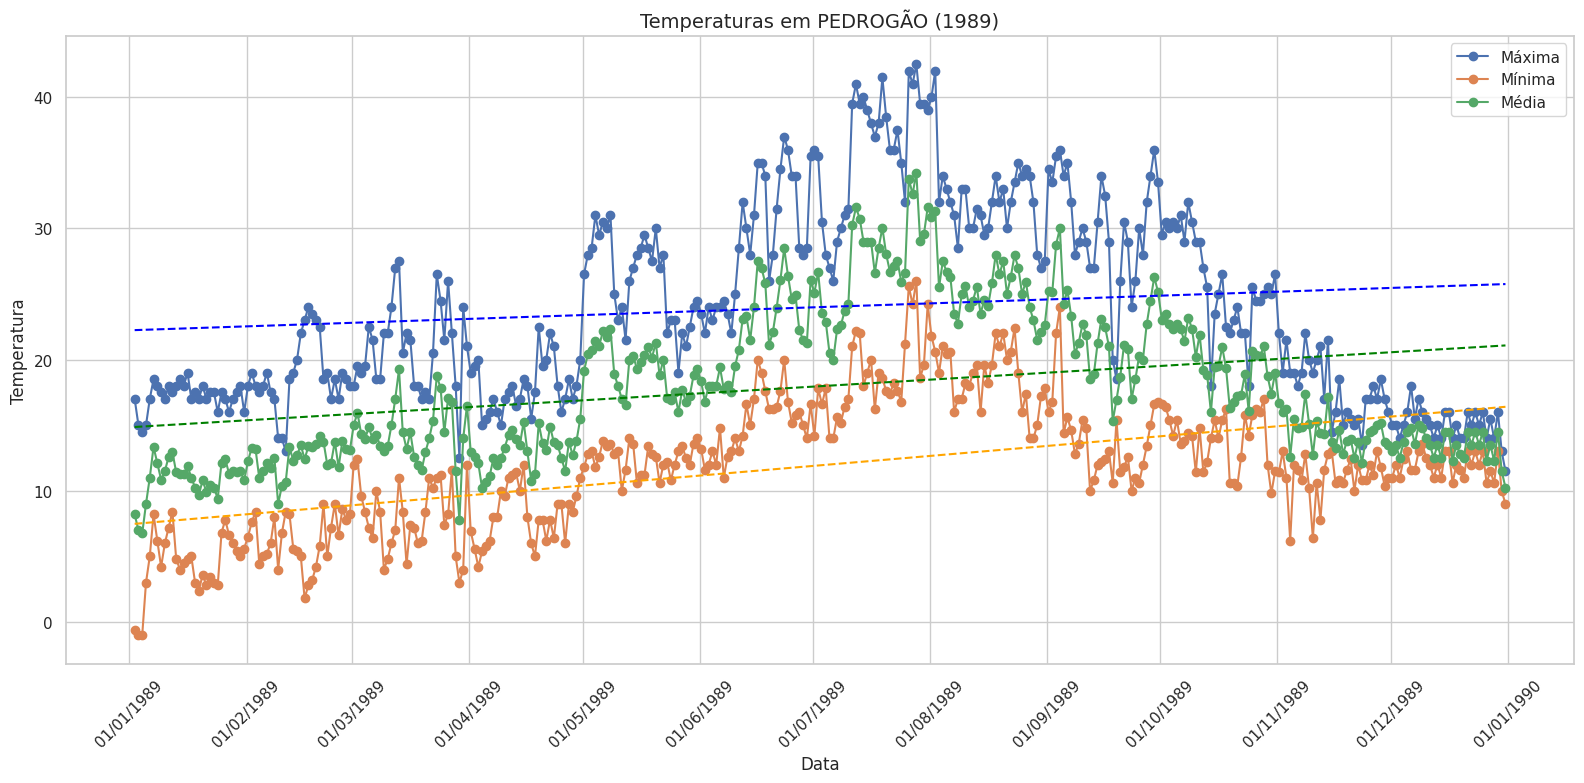

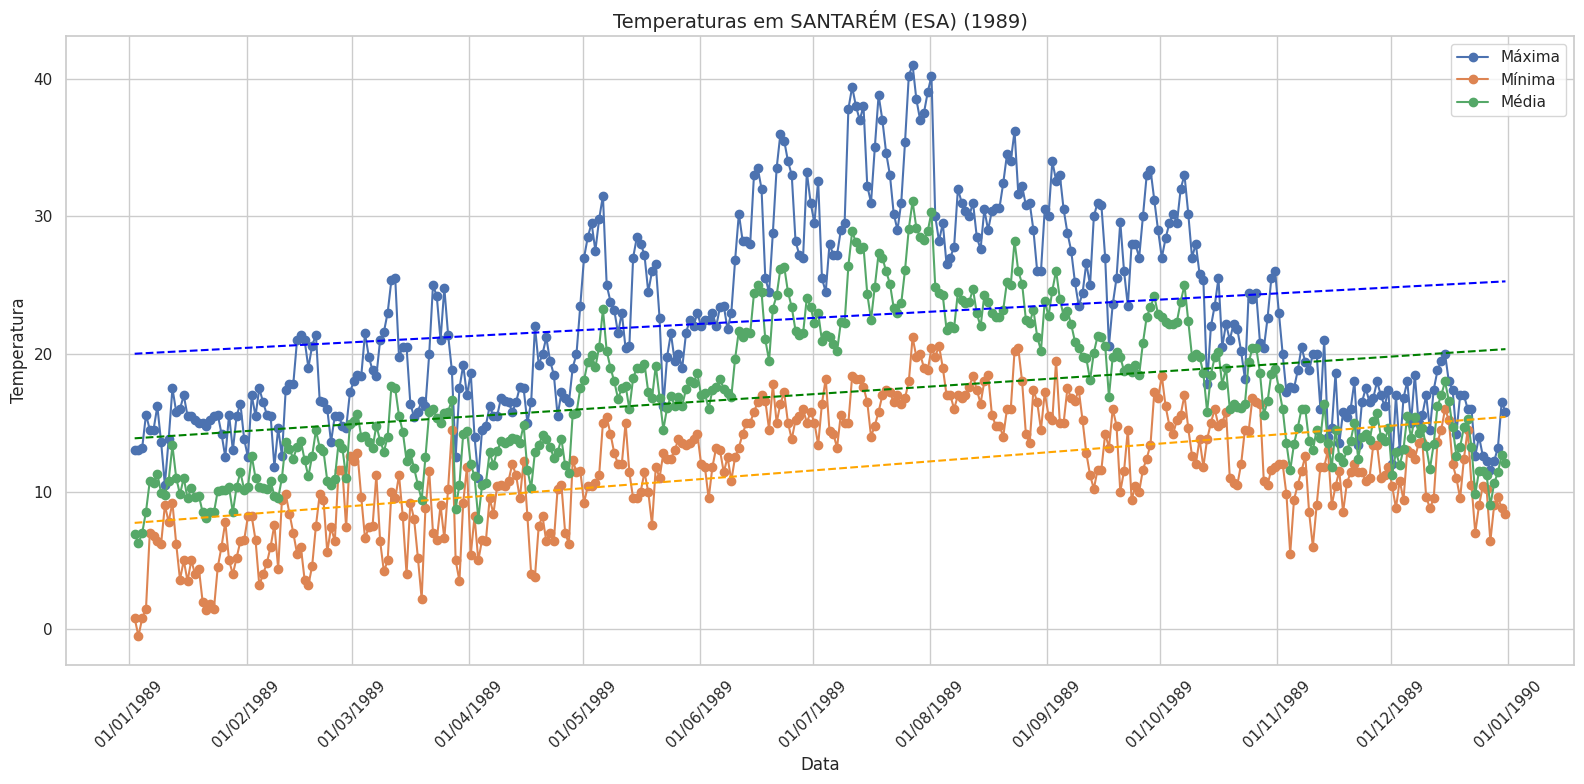

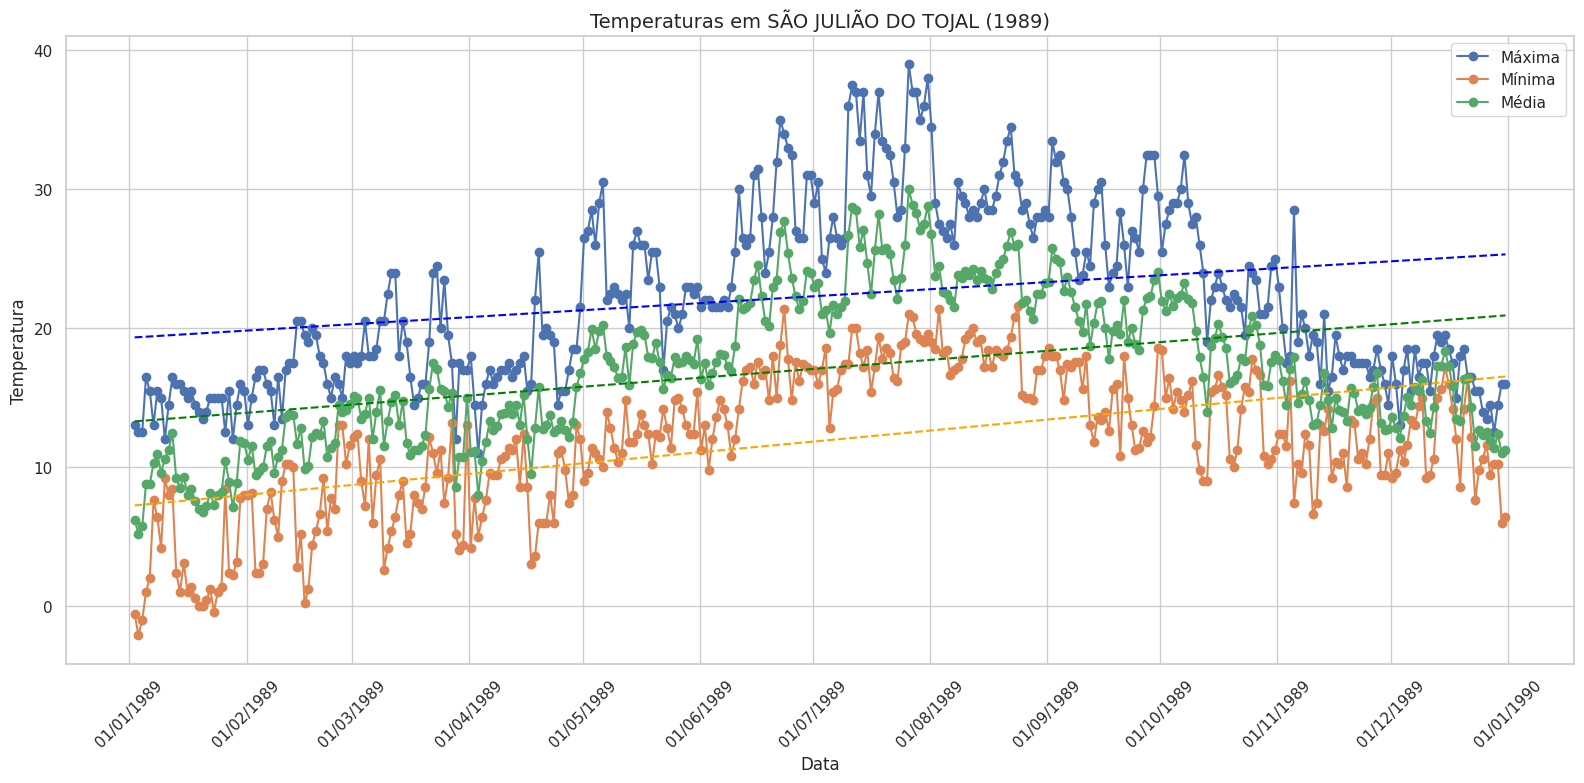

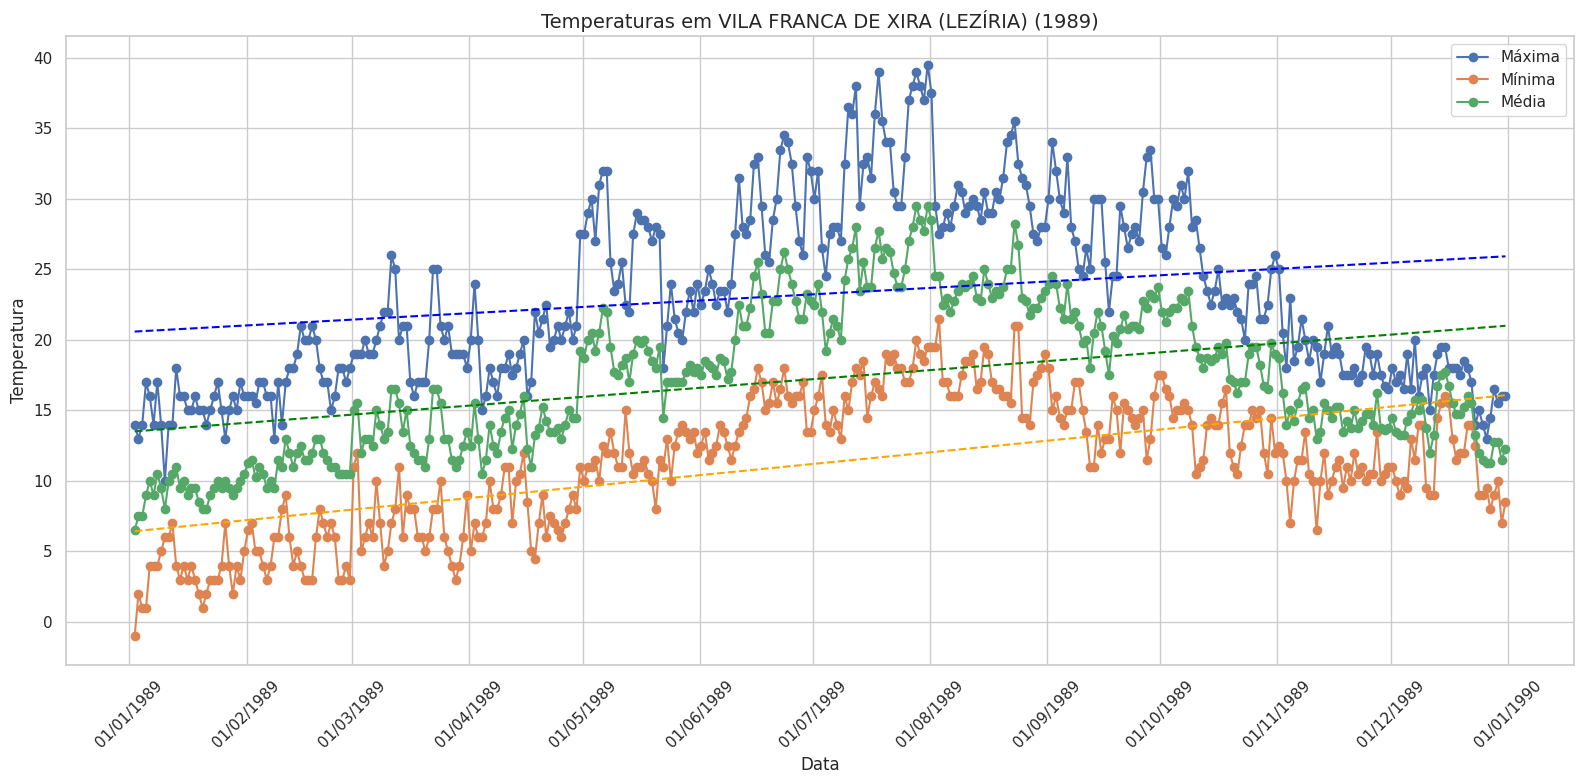

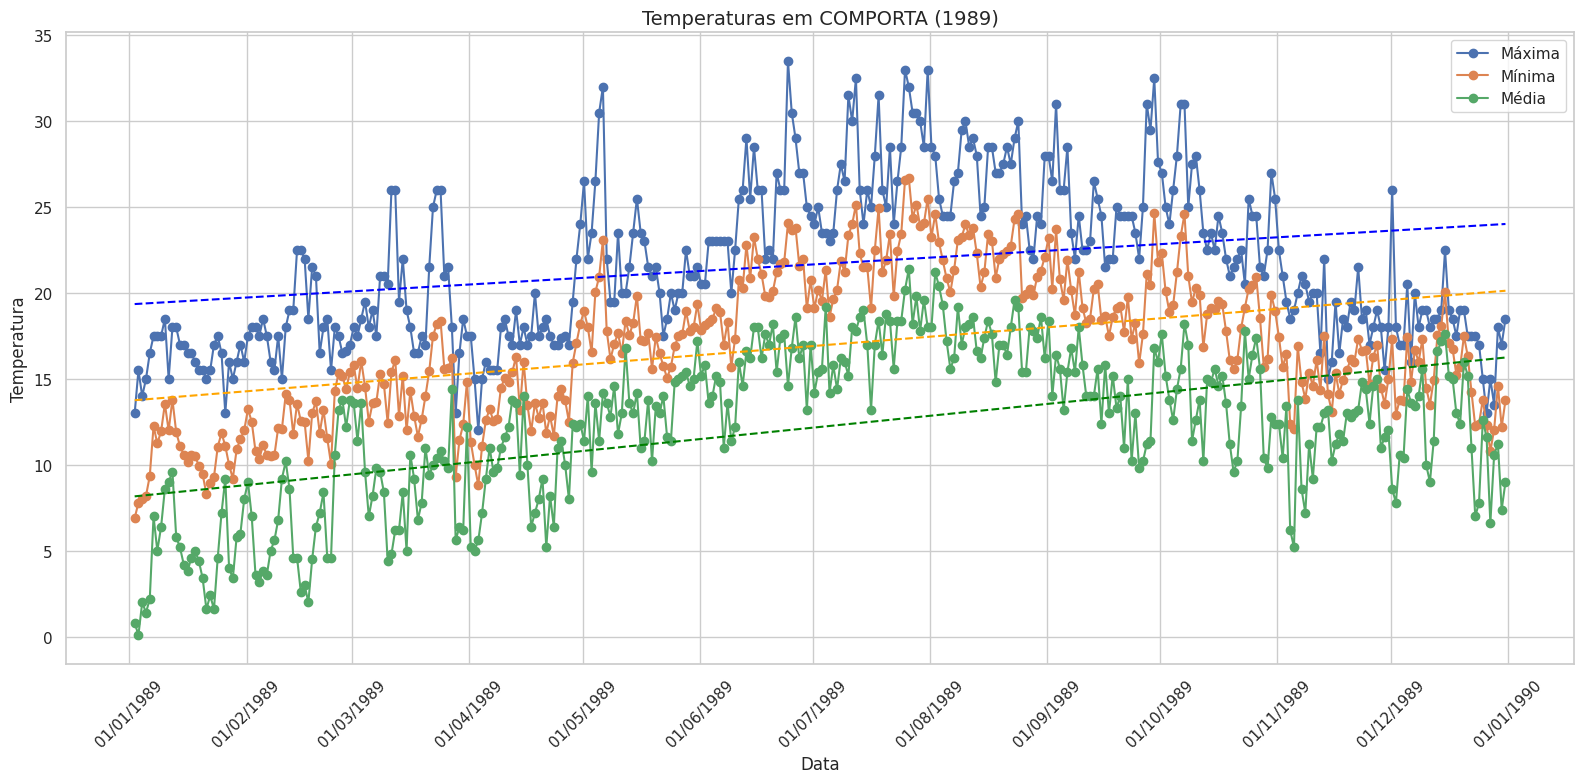

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_excel('/content/TEMPERATURAS_1989.xlsx')

# Drop the first row which seems to contain redundant column names
df = df.iloc[1:].copy()

# Convert the first column to datetime and extract only the date part
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True)

# Iterate over every three columns starting from the second column
for i in range(1, len(df.columns), 3):
    # Extract station name
    station_name = df.columns[i].rsplit(' ', 1)[0]

    # Create a figure and axis for the current station
    plt.figure(figsize=(16, 8))

    # Plot maximum, minimum, and average temperatures
    plt.plot(df['DATA'], pd.to_numeric(df[df.columns[i]], errors='coerce'), label='Máxima', marker='o')
    plt.plot(df['DATA'], pd.to_numeric(df[df.columns[i+1]], errors='coerce'), label='Mínima', marker='o')
    plt.plot(df['DATA'], pd.to_numeric(df[df.columns[i+2]], errors='coerce'), label='Média', marker='o')

    # Add trend lines
    z_max = np.polyfit(range(len(df['DATA'])), pd.to_numeric(df[df.columns[i]], errors='coerce'), 1)
    p_max = np.poly1d(z_max)
    plt.plot(df['DATA'], p_max(range(len(df['DATA']))), linestyle='dashed', color='blue')

    z_min = np.polyfit(range(len(df['DATA'])), pd.to_numeric(df[df.columns[i+1]], errors='coerce'), 1)
    p_min = np.poly1d(z_min)
    plt.plot(df['DATA'], p_min(range(len(df['DATA']))), linestyle='dashed', color='orange')

    z_avg = np.polyfit(range(len(df['DATA'])), pd.to_numeric(df[df.columns[i+2]], errors='coerce'), 1)
    p_avg = np.poly1d(z_avg)
    plt.plot(df['DATA'], p_avg(range(len(df['DATA']))), linestyle='dashed', color='green')

    # Format the x-axis to show dates
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))

    # Add labels and title
    plt.xlabel('Data', fontsize=12)
    plt.ylabel('Temperatura', fontsize=12)
    plt.title(f'Temperaturas em {station_name} (1989)', fontsize=14)
    plt.legend()

    # Rotate date labels and adjust layout
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
